# Import Data

In [1]:
import os
import pandas as pd
import numpy as np
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
# import autosklearn.regression
import sklearn.model_selection
import sklearn.metrics
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [36]:
df = []
src = '/kaggle/input/farm-connect-soil-water-content-prediction/train/train'
for file in os.listdir(src):
    df.append(pd.read_csv(os.path.join(src, file)))
df = pd.concat(df)
x_train = df[['time','1Air Humidity', '1AirTemperature', '1LightHigh',
                '1LightLow', '11Rain Accumulate (mm)', '11Rain count','12WindSpeed',
                '23SoilEC', '23SoilpH', '23SoilTemp.อุณหภูมิดิน',  '26N', '26P', '26K',
                '29SoilTension', 'flow1']]
y_train = df[['23SoilWC ค.ชื้นดิน']]

In [37]:
x_test = []
for f in ['02', '09']:
    x_test.append(
        pd.read_csv(
            f'/kaggle/input/farm-connect-soil-water-content-prediction/test/test/set{f}.csv'
        )
    )
x_test = pd.concat(x_test)
x_test = x_test[['time','1Air Humidity', '1AirTemperature', '1LightHigh',
                '1LightLow', '11Rain Accumulate (mm)', '11Rain count','12WindSpeed',
                '23SoilEC', '23SoilpH', '23SoilTemp.อุณหภูมิดิน',  '26N', '26P', '26K',
                '29SoilTension', 'flow1']]

# EDA

In [4]:
df.columns #23SoilWC ค.ชื้นดิน

Index(['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh',
       '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed',
       '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน',
       '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1'],
      dtype='object')

In [5]:
df.head(5)

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,06_1,00:48:41.938206+00,64.6,17.9,0.0,6.77,0.0,0.0,1.8,1.0,31.9,20.7,0.11,7.1,20.0,93.0,86.0,30.0,0.0
1,06_2,00:50:41.955304+00,65.5,17.7,0.0,7.06,0.0,0.0,2.6,0.0,31.9,20.7,0.11,7.0,20.0,93.0,86.0,29.0,0.0
2,06_3,00:52:41.972839+00,64.6,18.2,0.0,7.33,0.0,0.0,0.1,2.0,31.7,20.7,0.11,7.1,20.0,93.0,86.0,30.0,0.0
3,06_4,00:54:41.950613+00,64.1,18.3,0.0,7.47,0.0,0.0,0.6,1.0,31.4,20.7,0.11,7.0,20.0,93.0,86.0,29.0,0.0
4,06_5,00:56:41.945975+00,66.1,17.9,0.0,7.67,0.0,0.0,1.5,2.0,32.1,20.7,0.11,7.0,20.0,93.0,86.0,30.0,0.0


In [6]:
df.describe(include='all')

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
count,1111,1111,1105.000000,1105.000000,1105.000000,1105.000000,1105.0,1105.0,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1001.000000,1001.000000,1001.000000,1028.000000,1111.000000
unique,1111,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,07_119,04:45:34.286087+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,49.850769,28.389502,20.934018,25.446733,0.0,0.0,0.737703,3.035262,42.377396,21.872514,0.119412,6.615099,22.592408,98.863137,91.487512,45.117704,0.411341
std,NaN,NaN,11.941320,4.216069,30.568263,24.082690,0.0,0.0,0.762490,2.259545,12.530553,1.090205,0.019279,1.073522,2.902017,6.791631,6.854786,32.349731,0.492298
min,NaN,NaN,32.300000,17.700000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,29.800000,19.900000,0.110000,4.800000,20.000000,92.000000,84.000000,18.000000,0.000000
25%,NaN,NaN,41.600000,25.100000,0.000000,4.990000,0.0,0.0,0.000000,1.000000,34.600000,21.400000,0.110000,5.100000,21.000000,94.000000,87.000000,24.000000,0.000000
50%,NaN,NaN,47.100000,28.600000,0.000000,10.540000,0.0,0.0,0.600000,2.500000,37.600000,21.900000,0.110000,7.000000,22.000000,97.000000,89.000000,29.000000,0.000000
75%,NaN,NaN,55.400000,31.200000,65.530000,53.340000,0.0,0.0,1.100000,5.000000,45.200000,22.900000,0.120000,7.300000,23.000000,100.000000,93.000000,74.250000,1.000000


In [7]:
df['11Rain Accumulate (mm)'].value_counts()

11Rain Accumulate (mm)
0.0    1105
Name: count, dtype: int64

In [8]:
df['11Rain count'].value_counts()

11Rain count
0.0    1105
Name: count, dtype: int64

In [38]:
x_train['time'] = pd.to_datetime(x_train['time'])
x_train['hour'] =  x_train['time'].dt.hour

x_test['time'] = pd.to_datetime(x_test['time'])
x_test['hour'] = x_test['time'].dt.hour

In [39]:
x_train = x_train.drop(columns=['time','11Rain Accumulate (mm)', '11Rain count'])
x_test = x_test.drop(columns=['time','11Rain Accumulate (mm)', '11Rain count'])

In [11]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [12]:
initial_eda(df)

Dimensions : 1111 rows, 19 columns
Total NA Values : 479 
                           Column Name  Data Type      #Distinct  NA Values
                                 index     object         1111          0
                                  time     object         1111          0
                         1Air Humidity    float64          375          6
                       1AirTemperature    float64          182          6
                            1LightHigh    float64            2          6
                             1LightLow    float64          919          6
                11Rain Accumulate (mm)    float64            1          6
                          11Rain count    float64            1          6
                           12WindSpeed    float64           40          5
                       13WindDirection    float64            8          5
                    23SoilWC ค.ชื้นดิน    float64          214          5
                23SoilTemp.อุณหภูมิดิน    float64   

In [40]:
## '1LightHigh' , 'flow1' cannot use mean to fill na
df['1LightHigh'] = df['1LightHigh'].fillna(method='ffill')

In [ ]:
sorted(df['23SoilWC ค.ชื้นดิน'].unique())

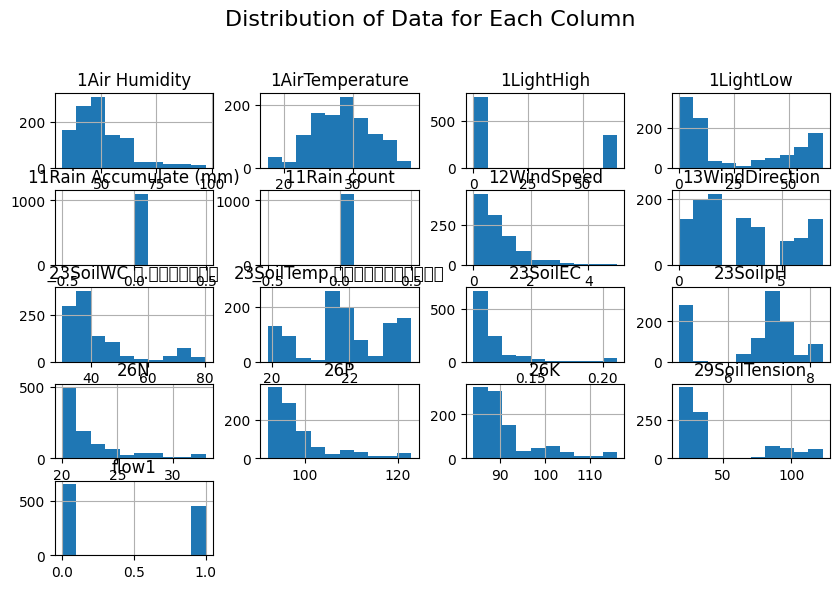

In [15]:
df.hist(figsize=(10, 6), bins=10)
plt.suptitle('Distribution of Data for Each Column', y=1.02, size=16)
plt.show()

#lAirTemperature
#

# Feture Engineering

In [41]:
application = df
categorical_list = []
numerical_list = []
for i in application.columns.tolist():
    if application[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 2
Number of numerical features: 17


In [42]:
initial_eda(df)

Dimensions : 1111 rows, 19 columns
Total NA Values : 473 
                           Column Name  Data Type      #Distinct  NA Values
                                 index     object         1111          0
                                  time     object         1111          0
                         1Air Humidity    float64          375          6
                       1AirTemperature    float64          182          6
                            1LightHigh    float64            2          0
                             1LightLow    float64          919          6
                11Rain Accumulate (mm)    float64            1          6
                          11Rain count    float64            1          6
                           12WindSpeed    float64           40          5
                       13WindDirection    float64            8          5
                    23SoilWC ค.ชื้นดิน    float64          214          5
                23SoilTemp.อุณหภูมิดิน    float64   

In [43]:
x_train = x_train.apply(lambda col: col.fillna(col.mode()[0]))
x_test = x_test.apply(lambda col: col.fillna(col.mode()[0]))
y_train = y_train.apply(lambda col: col.fillna(col.mode()[0]))
initial_eda(x_train)

Dimensions : 1111 rows, 14 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                         1Air Humidity    float64          375          0
                       1AirTemperature    float64          182          0
                            1LightHigh    float64            2          0
                             1LightLow    float64          919          0
                           12WindSpeed    float64           40          0
                              23SoilEC    float64           11          0
                              23SoilpH    float64           25          0
                23SoilTemp.อุณหภูมิดิน    float64           30          0
                                   26N    float64           14          0
                                   26P    float64           32          0
                                   26K    float64           33          0
                         29SoilTension    float64     

# Feature Selection

In [44]:
select_feature = ['23SoilEC',
 '26K',
 '1AirTemperature',
 '26P',
 '12WindSpeed',
 '1LightLow',
 '1LightHigh',
 '26N',
 '1Air Humidity']
sum_select = ['23SoilTemp.อุณหภูมิดิน' , '23SoilEC', '1Air Humidity','1AirTemperature','23SoilpH']

In [45]:
X = x_train
y = y_train
feature_name = X.columns.tolist()



In [165]:
from sklearn.preprocessing import StandardScaler
def scale_datasets(x_train, x_test):

    """
    Standard Scale test and train data
    Z - Score normalization
    """
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
    standard_scaler.fit_transform(x_train),
    columns=x_train.columns
    )
    x_test_scaled = pd.DataFrame(
    standard_scaler.transform(x_test),
    columns = x_test.columns
    )
    return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(X, x_test)
xtn_selected = x_train_scaled[select_feature_rf]
xte_selected = x_test_scaled[select_feature_rf]

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_scaled, y, test_size=0.2, random_state=101)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300, random_state=30,bootstrap = True,max_features='sqrt',
                             max_depth=50,min_samples_leaf=1,min_samples_split=2)
model.fit(X_train,y_train)
y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
print("mse_rf: ", mse_rf)
feature_imp = pd.Series(model.feature_importances_, index=feature_name).sort_values(ascending=False)
select_feature_rf = list(feature_imp[:11].index)
print(select_feature_rf)

mse_rf:  7.637309591400029
['23SoilEC', '1LightLow', '26P', '26K', '1AirTemperature', '23SoilpH', '26N', '29SoilTension', 'hour', '23SoilTemp.อุณหภูมิดิน', '1Air Humidity']


In [54]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_train_scaled, y, test_size=0.3, random_state=101)


# Neural Network

In [166]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,AdamW,Adamax  
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError,MeanSquaredError
from sklearn.metrics import mean_squared_error
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.0005
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adamax(learning_rate=learning_rate), 
    metrics=[mse]
)
      
history = model.fit( 
    xtn_selected.values, 
    y.values, 
    epochs=10000, 
    batch_size=32,
    validation_split=0.3
)

##### y_pred_neural = model.predict(xte_selected)

In [63]:
mse_neural  = mean_squared_error(y_test , y_pred_neural )
print(mse_neural)

258.9694007542791


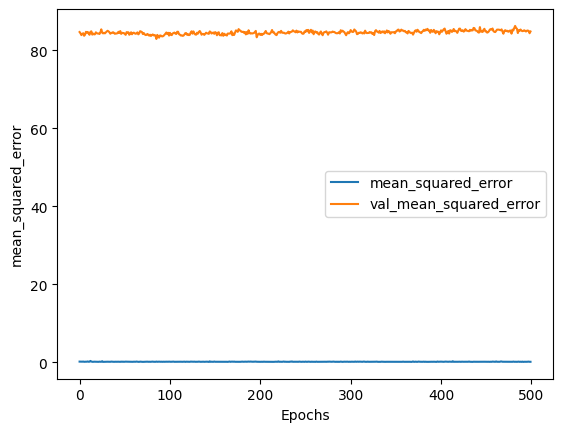

In [190]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

In [191]:
y_pred_neural = model.predict(xte_selected)
y_hat = y_pred_neural
y_hat = pd.DataFrame(y_hat)
y_hat = y_hat.squeeze()
submission = pd.read_csv('/kaggle/input/farm-connect-soil-water-content-prediction/sample_submission.csv')
submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y_hat[1:]
submission.to_csv("IOT19.csv",index=False)

8/8 [==============================] - 0s 2ms/step


# Random forest

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_scaled, y, test_size=0.2, random_state=101)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300, random_state=30,bootstrap = True,max_features='sqrt',
                             max_depth=50,min_samples_leaf=1,min_samples_split=2)
model.fit(X_train,y_train)

y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
print("mse_rf: ", mse_rf)
feature_imp = pd.Series(model.feature_importances_, index=feature_name).sort_values(ascending=False)
print(feature_imp)
select_feature = list(feature_imp[:11].index)
print(select_feature)


# model.fit(x_train_scaled, y)
# y_hat = model.predict(x_test_scaled)
# y_hat = pd.DataFrame(y_hat)
# y_hat = y_hat.squeeze()

# submission = pd.read_csv('/kaggle/input/farm-connect-soil-water-content-prediction/sample_submission.csv')
# submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y_hat[1:]
# submission.to_csv("IOT7.csv",index=False)

mse_rf:  7.637309591400029
23SoilEC                  0.276520
1LightLow                 0.090355
26P                       0.086690
26K                       0.080719
1AirTemperature           0.073035
23SoilpH                  0.068353
26N                       0.066614
29SoilTension             0.063018
hour                      0.061853
23SoilTemp.อุณหภูมิดิน    0.050144
1Air Humidity             0.041632
12WindSpeed               0.020126
flow1                     0.016377
1LightHigh                0.004564
dtype: float64
['23SoilEC', '1LightLow', '26P', '26K', '1AirTemperature', '23SoilpH', '26N', '29SoilTension', 'hour', '23SoilTemp.อุณหภูมิดิน', '1Air Humidity']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30,bootstrap = False,max_features='sqrt',
                             max_depth=None,min_samples_leaf=1,min_samples_split=2)
model.fit(X_train,y_train)

y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_rf


In [ ]:
model.fit(x_train_scaled[sum_select], y_train)
y_hat = model.predict(x_test_scaled[sum_select])
y_hat = pd.DataFrame(y_hat)
y_hat = y_hat.squeeze()
submission = pd.read_csv('/kaggle/input/farm-connect-soil-water-content-prediction/sample_submission.csv')
submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y_hat[1:]
submission.to_csv("IOT5.csv",index=False)

In [ ]:
submission = pd.read_csv('/kaggle/input/farm-connect-soil-water-content-prediction/sample_submission.csv')

In [ ]:
submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y_hat[1:]
submission.to_csv("IOT5.csv",index=False)

In [ ]:
feature_imp = pd.Series(model.feature_importances_, index=feature_name).sort_values(ascending=False)
select_feature = list(feature_imp[:5].index)

1. Pearson Correlation

In [ ]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-10:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [ ]:
cor_support, cor_feature = cor_selector(X, y)


2. RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Choose the number of features
fit = rfe.fit(X, y)

select_RFE = X.columns[fit.support_]
len(select_RFE)

3. Lasso Regression (L1 Regularization)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Standardize the features (important for Lasso regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso regression
lasso = Lasso(alpha=0.1)  # Choose the regularization strength (alpha)
lasso.fit(X_scaled, y)

# Get the coefficients and select the top 10 features
coef_abs = abs(lasso.coef_)
selected_Lasso = X.columns[coef_abs.argsort()[::-1][:10]]
len(selected_Lasso)

4. Tree-based Methods

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = model.feature_importances_

# Sort features by importance and select the top 10
selected_rm = X.columns[feature_importance.argsort()[::-1][:10]]
len(selected_rm)

In [ ]:
pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame({
#     'Pearson': cor_feature,
    'RFE': select_RFE,
    'Lasso': selected_Lasso,
    'Random Forest': selected_rm
})
feature_selection_df

In [ ]:
sum_select = ['23SoilTemp.อุณหภูมิดิน' , '23SoilEC', '1Air Humidity','1AirTemperature','23SoilpH']

In [ ]:
y_hat = model.predict(x_test_scaled)
y_hat = pd.DataFrame(y_hat)
y_hat = y_hat.squeeze()

In [ ]:
submission = pd.read_csv('/kaggle/input/farm-connect-soil-water-content-prediction/sample_submission.csv')

In [ ]:
y_hat.shape

In [ ]:
submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y_hat[1:]
submission.to_csv("IOT4.csv",index=False)

In [ ]:
submission.to_csv("IOT4.csv",index=False)